In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

(100, 1)
(100,)
(1000, 1)


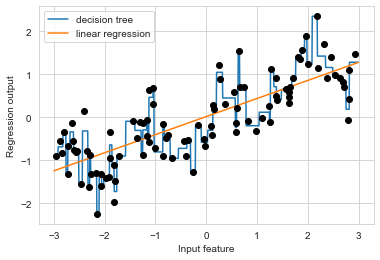

In [2]:
# 最良のデータ表現方法は、データの意味だけでなく、利用する機械学習のモデルにも依存する
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mglearn

X, y = mglearn.datasets.make_wave(n_samples = 100)
print(X.shape)
print(y.shape)
line = np.linspace(-3,3, 1000, endpoint = False).reshape(-1,1)
print(line.shape)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label = "decision tree")
reg = LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line), label = "linear regression")
plt.plot(X[:,0], y , "o", c = "k")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc = "best")

In [3]:
# 個々のデータポイントがどのビンに入るかを記録するのは、np.digitize関数で簡単にできる
bins = np.linspace(-3, 3, 11)
print(f"bins :{bins}")
which_bin = np.digitize(X, bins = bins)
print("\nData points:\n", X[:5])
print("\nBin membersship for data points:\n", which_bin[:5])

bins :[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]

Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membersship for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
X_binned.shape: (100, 10)


Text(0.5, 0, 'Input feature')

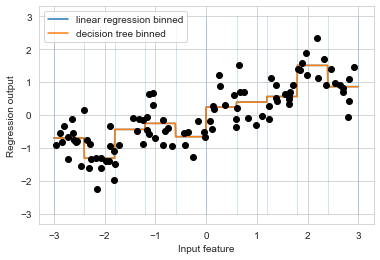

In [4]:
# 上記で行ったのは、waveデータセットの単一の連続値入力特徴量の、どのビンにデータポイントが入っているかを表現したカテゴリ特徴量への置き換えだ
# このデータにscikit-learnモデルを適用するには、この離散値特徴量をワンホットエンコーディングに変換する必要がある
# これには、preprocessingモジュールのOneHotEncoderを用いる。これはpandas.get_dummiedと同じ機能を持つが、整数値で表現されたカテゴリ変数しか扱えない
# 下記例は、ビンごとに特徴量が一定になるので、どのようなモデルを持ってきても、ビンの中では同じ値を予測することになる
# ビニングの前後でモデルが学習したことを比較すると、線形モデルに関してはより柔軟になっているが、決定木に関しては柔軟性が低下している
# 一般に、特徴量をビニングすることは決定木にとってはメリットがない。もともと決定木はデータを任意の場所で分割して学習できるからだ
# また、決定木は複数の特徴量を同時に扱うことができるが、ビニングは１つの特徴量ごとにしか行えない
# 一方で、線形モデルにおいてはこの変換による表現力増大の効果は絶大である
# あるデータセットに対してどうしても線形モデルを使いたい場合、例えばデータがとても大きくて高次元な場合などに、
# いくつかの特徴量出力と非線形な関係を持つようなら、(その非線形な関係を持つ特徴量に対して)ビニングを使うとモデルの表現力を増強することができる
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print(X_binned[:5])
print(f"X_binned.shape: {X_binned.shape}")

line_binned = encoder.transform(np.digitize(line, bins = bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label = "linear regression binned")
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label = "decision tree binned")
plt.plot(X[:,0], y, "o", c = "k")
plt.vlines(bins, -3, 3, linewidth = 1, alpha = .2)
plt.legend(loc = "best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")